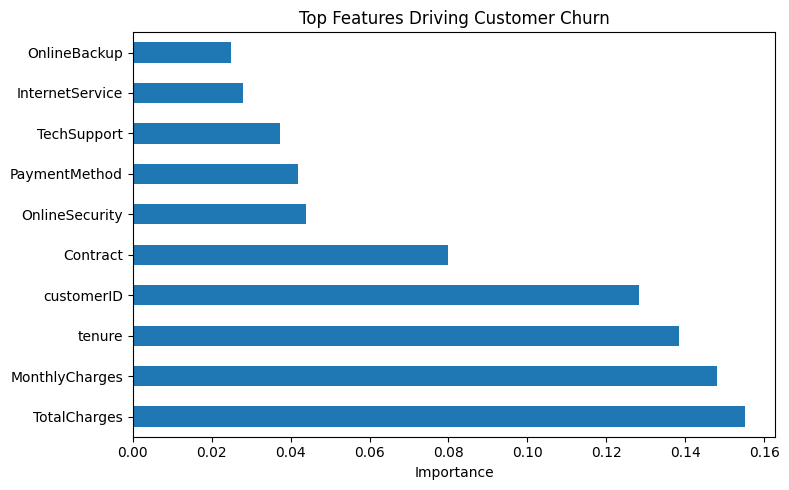

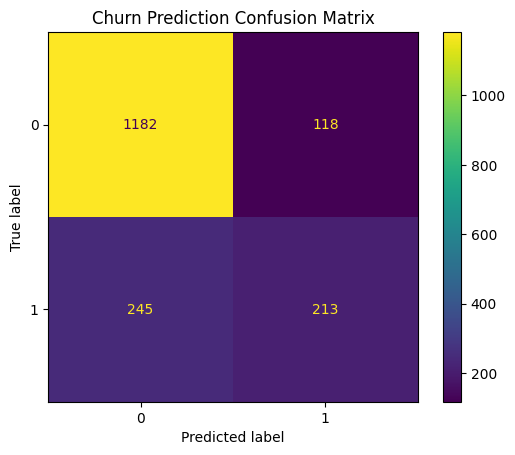

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load data
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preprocessing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Model
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

# Plot Feature Importance
plt.figure(figsize=(8,5))
top_features.plot(kind='barh')
plt.title("Top Features Driving Customer Churn")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Churn Prediction Confusion Matrix")
plt.show()
